# <img style="float: left; padding-right: 20px; width: 100px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> MDS3050-Actividad de Graduación I
**Pontificia Universidad Católica de Chile**<br>
**Magíster en Ciencia de Datos**<br>
**2024**<br>
----
## Estudio inicial del proyecto

# Análisis en base a data de encuesta y notas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Carga de dataset de encuesta de estudiantes y notas parciales y final

In [4]:
#columnas del dataset
df.columns

Index(['SEMESTRE_CARACTERIZACION', 'CODIGO', 'FECHA_HORA',
       ''EDU-¿Cómo se siente con los métodos de estudio que utiliza usualmente?'',
       ''EDU-¿Con cuál de las siguientes afirmaciones se siente identificado?'',
       ''EDU-¿Conoce el plan de estudios de la carrera que va a iniciar?'',
       ''EDU-¿Considera que tiene dificultad con alguna de las siguientes situaciones? (Múltiple respuesta)'',
       ''EDU-¿Considera que tiene dificultad con algunos de los siguientes aspectos? (Múltiple respuesta)'',
       ''EDU-¿Cuál de las siguientes opciones definen mejor la razón o razones principales por las cuales usted eligió el actual pro',
       ''EDU-¿Cuál(es) de las siguientes características describen mejor el espacio que tiene en su casa para estudiar? (Múltiple re',
       ''EDU-¿Cuáles de las siguientes situaciones presenta en la actualidad?'',
       ''EDU-Desde su graduación como bachiller usted'',
       ''EDU-Dispone del tiempo necesario para dedicar a sus responsabili

In [7]:
df['TCKG_GRDE_CODE_FINAL'].unique()

array(['4.20', '4.30', '4.58', '3.92', '4.66', '4.12', '4.44', '4.27',
       '3.93', '4.65', '1.29', '0.00', '4.52', '3.41', '3.42', '3.96',
       '4.06', '3.90', '4.02', '4.29', '3.76', '4.36', '3.79', '4.41',
       '4.92', '4.98', '4.19', '4.26', '4.05', '4.68', '4.07', '4.54',
       '3.33', '3.40', '4.09', '4.15', '4.18', '4.67', '4.72', '4.32',
       '4.80', '4.34', '5.00', '4.33', '4.62', '4.01', '3.97', '4.73',
       '4.96', '4.88', '4.42', '4.49', '3.50', '3.63', '3.32', '4.45',
       '4.46', '4.60', '4.40', '4.56', '4.48', '4.74', '3.81', '4.13',
       '2.42', '3.16', '2.79', '4.28', '4.25', '4.77', '4.38', '4.70',
       '4.59', '3.71', '3.52', '4.14', '4.22', '3.88', '3.73', '3.51',
       '3.87', '3.17', '4.04', '4.31', '4.78', '4.90', '3.62', '3.65',
       '4.39', '3.72', '3.15', '4.47', '0.97', '1.83', '3.74', '4.03',
       '4.61', '4.43', '4.24', '2.59', '4.10', '4.64', '3.82', '4.16',
       '4.84', '3.98', '3.39', '2.39', '3.05', '4.11', '3.89', '4.08',
      

Durante el análisis se encontrarlo lo siguiente datos anómalos en la variable de nota final 
- E
- A
- I
- S


## EDA

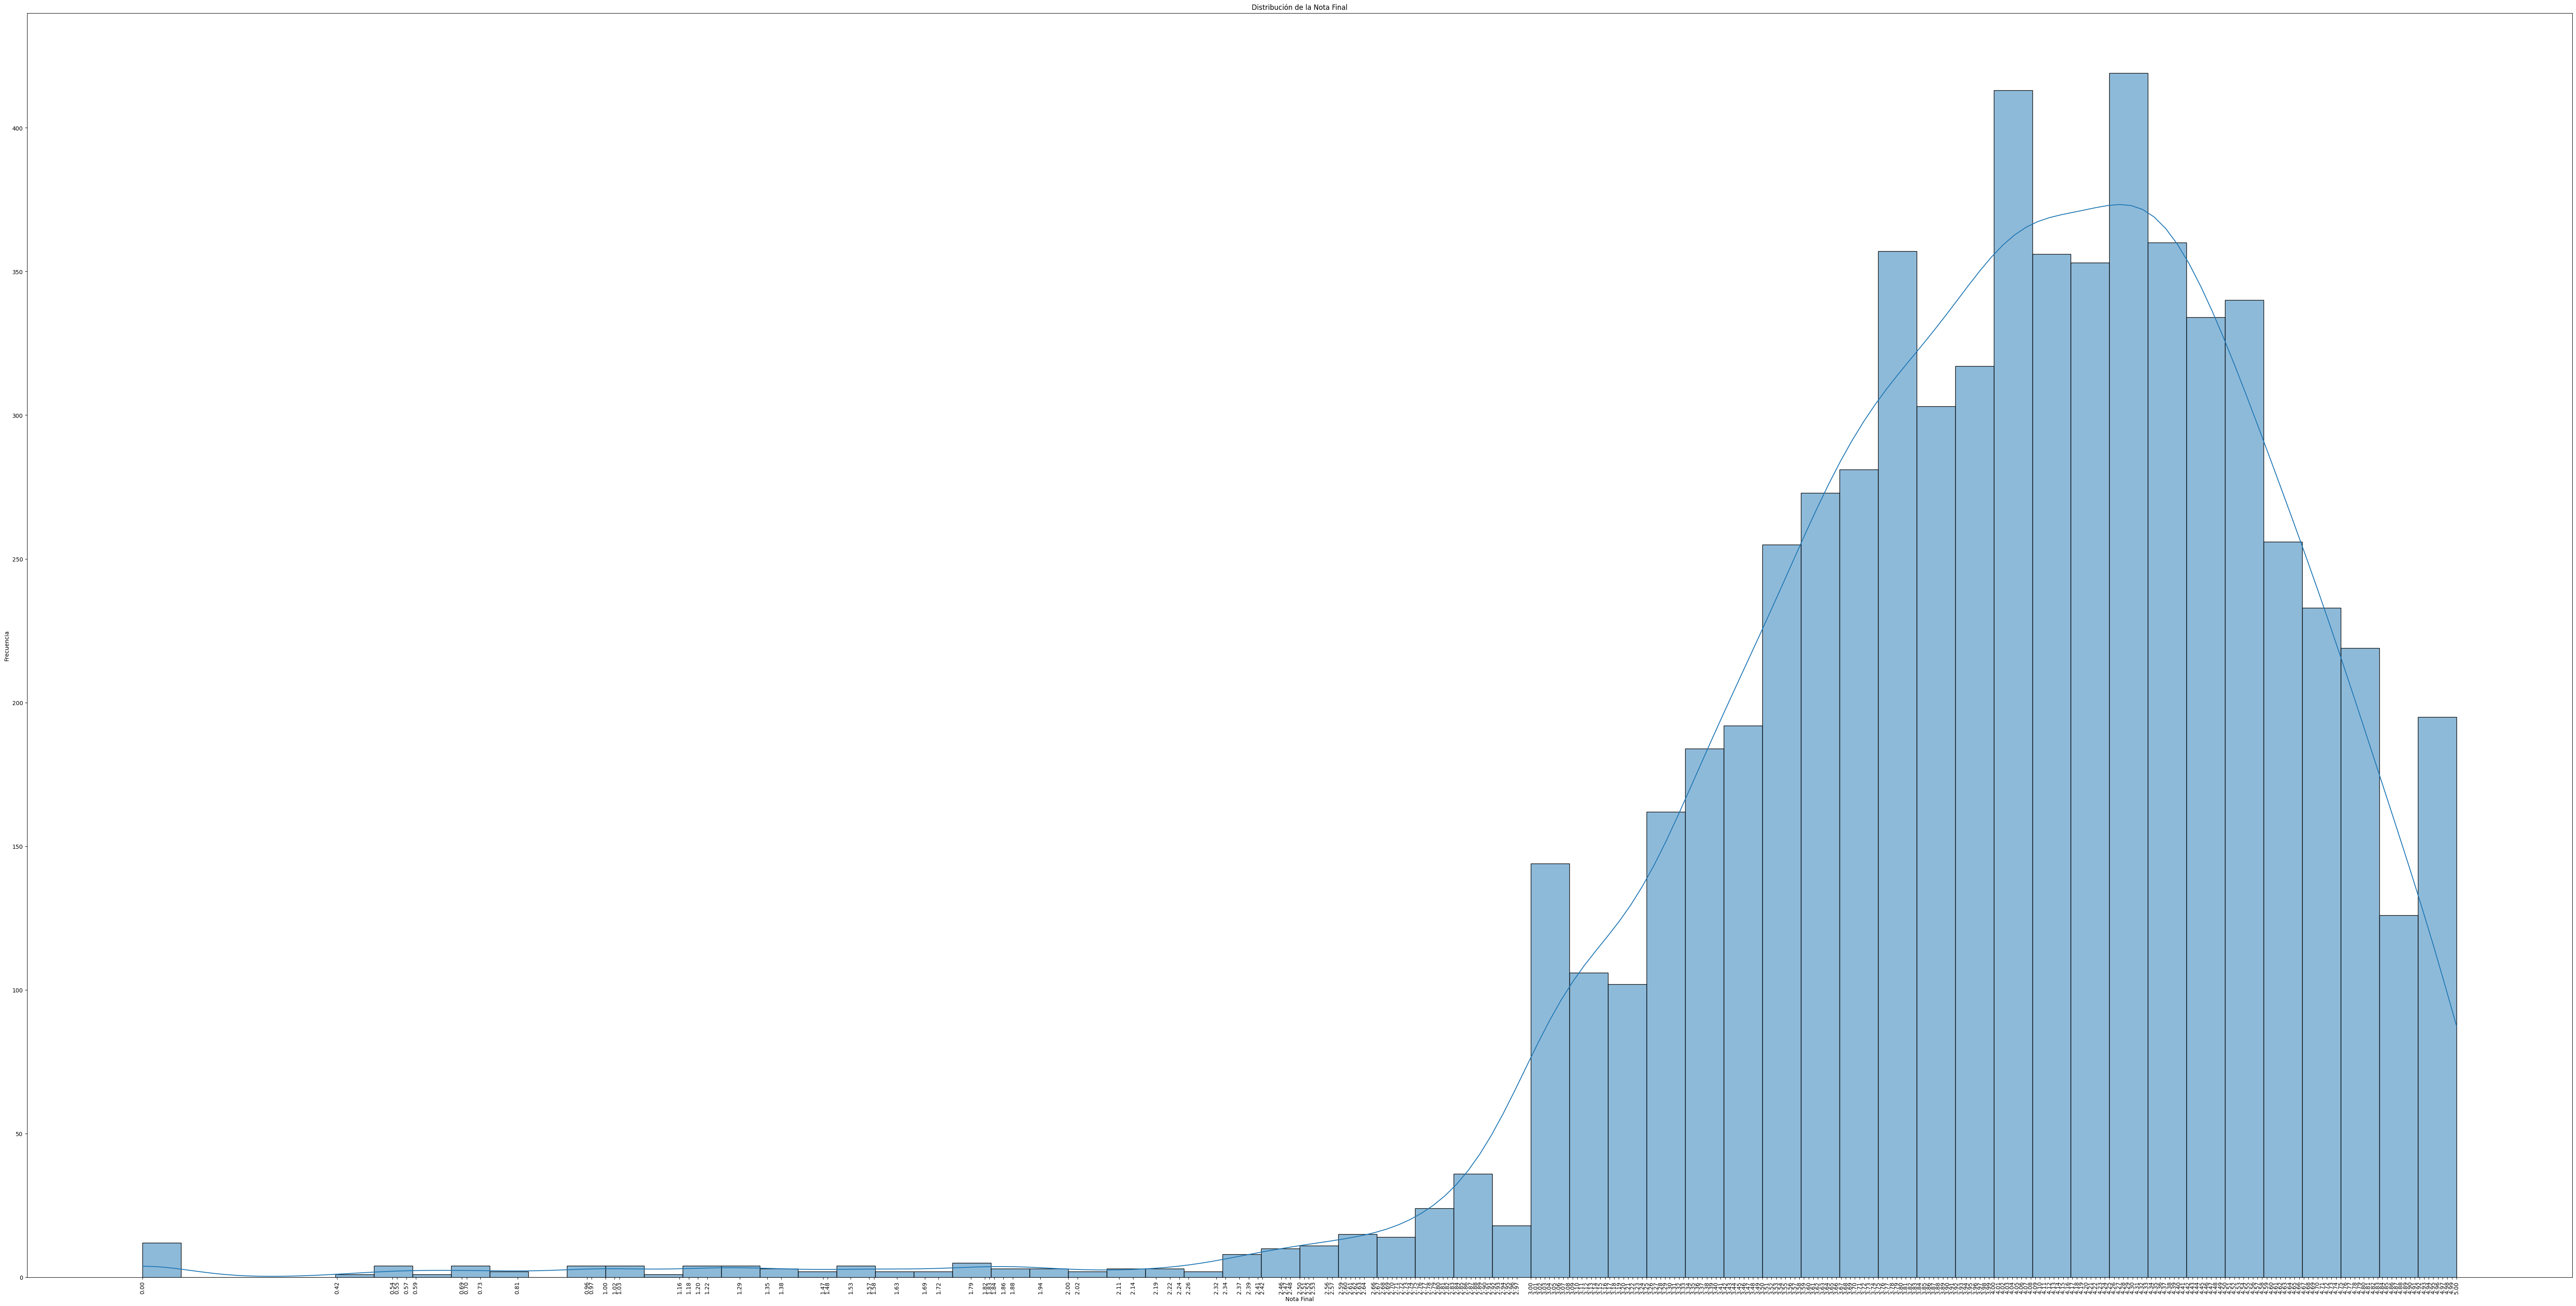

In [10]:
# Convertir la columna 'TCKG_GRDE_CODE_FINAL' a numérica
df['TCKG_GRDE_CODE_FINAL'] = pd.to_numeric(df['TCKG_GRDE_CODE_FINAL'], errors='coerce')

sorted_grades = sorted(df['TCKG_GRDE_CODE_FINAL'].dropna().unique())

# Distribución de nota final
plt.figure(figsize=(80,40))
sns.histplot(df['TCKG_GRDE_CODE_FINAL'], kde=True)
plt.title('Distribución de la Nota Final')
plt.xlabel('Nota Final')
plt.ylabel('Frecuencia')

# Ajustar la frecuencia de los ticks del eje X y rotar las etiquetas
plt.xticks(ticks=sorted_grades, rotation=90, fontsize=10)

plt.show()

Distribución de los datos en donde se obtiene la frecuencia de las notas finales. Se puede apreciar una distribución mas cercana de las 4.5. No se ve una distribución normal 

In [11]:
# Convertir columnas de notas parciales a numéricas, ignorando errores
for col in df.filter(regex='SEQ_').columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir la columna de nota final a numérica, ignorando errores
df['TCKG_GRDE_CODE_FINAL'] = pd.to_numeric(df['TCKG_GRDE_CODE_FINAL'], errors='coerce')


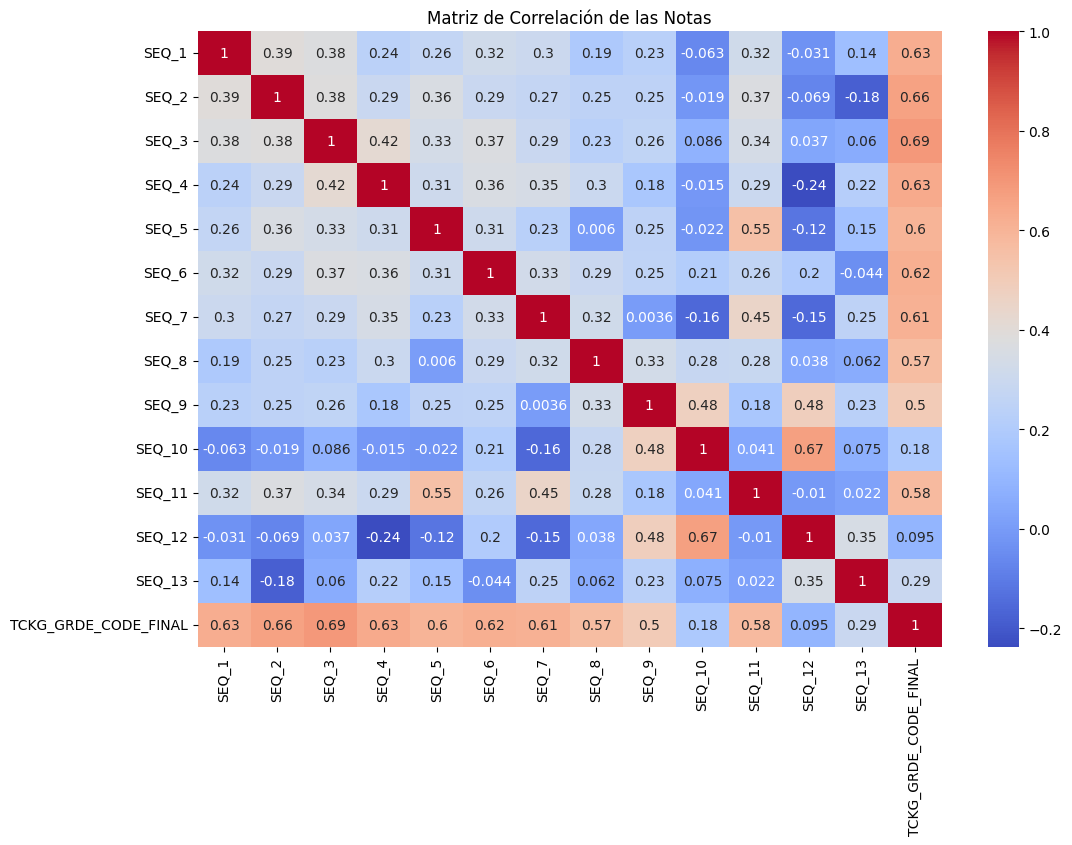

In [12]:
# Correlación entre las notas parciales y la nota final
partial_scores = df.filter(regex='SEQ_').columns.tolist()
partial_scores.append('TCKG_GRDE_CODE_FINAL')
plt.figure(figsize=(12, 8))
sns.heatmap(df[partial_scores].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Notas')
plt.show()

Se puede apreciar una correlación fuerte en las primera 7 notas y luego en la nota 11

In [14]:
# Convertir la columna TCKG_GRDE_CODE_FINAL a numérica
df['TCKG_GRDE_CODE_FINAL'] = pd.to_numeric(df['TCKG_GRDE_CODE_FINAL'], errors='coerce')

# Eliminar registros donde TCKG_GRDE_CODE_FINAL es NaN
df = df.dropna(subset=['TCKG_GRDE_CODE_FINAL'])

# Convertir la columna TCKG_GRDE_CODE_FINAL a int64
df['TCKG_GRDE_CODE_FINAL'] = df['TCKG_GRDE_CODE_FINAL'].astype('int64')

/tmp/ipykernel_33721/3595694451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TCKG_GRDE_CODE_FINAL'] = df['TCKG_GRDE_CODE_FINAL'].astype('int64')


In [16]:
# Crear la nueva columna 'target'
df['target'] = (df['TCKG_GRDE_CODE_FINAL'] >= 3.5).astype(int)

/tmp/ipykernel_33721/2263433528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = (df['TCKG_GRDE_CODE_FINAL'] >= 3.5).astype(int)


Después del Análisis nos quedamos con un total de 33 variables, Eligiendo variables de la encuesta y las dos primeras notas, para predecir la nota final de cada estudiante

## Modelos Lineales

### Regresión Lineal 

Para la construcción de los modelos de regresión lineal, se llevó a cabo una revisión de los valores nulos en el dataset. En el caso de las variables numéricas con datos faltantes, se procedió a reemplazar los valores nulos con la media de cada variable. Para las variables categóricas, los datos nulos se remplazaron con la moda correspondiente de cada variable.

In [25]:
# Eliminar la columna 'target' del DataFrame
df_model = df_model.drop(columns=['target'])

In [26]:
print(df_model.isnull().sum())

SEMESTRE_CARACTERIZACION                                                                                                          0
CODIGO                                                                                                                            0
EDU-¿Cómo se siente con los métodos de estudio que utiliza usualmente?                                                          542
EDU-¿Conoce el plan de estudios de la carrera que va a iniciar?                                                                 542
FAM-¿Cuál es el nivel de escolaridad de su madre?                                                                               542
FAM-¿Cuál es el nivel de escolaridad de su padre?                                                                               542
FAM-Cuando usted debe tomar decisiones importantes ¿Consulta la opinión de su familia?                                          542
FAM-¿Cuántos hermanos tiene que hayan culminado un programa de Educación Sup

In [27]:
# Separar las columnas numéricas y categóricas
numeric_cols = df_model.select_dtypes(include=['number']).columns
categorical_cols = df_model.select_dtypes(include=['object']).columns

In [28]:
# Llenar valores nulos en columnas numéricas con la mediana
df_model[numeric_cols] = df_model[numeric_cols].fillna(df_model[numeric_cols].median())

In [29]:
# Llenar valores nulos en columnas categóricas con el valor más frecuente (moda)
df_model[categorical_cols] = df_model[categorical_cols].fillna(df_model[categorical_cols].mode().iloc[0])


In [30]:
print(df_model.isnull().sum())

SEMESTRE_CARACTERIZACION                                                                                                        0
CODIGO                                                                                                                          0
EDU-¿Cómo se siente con los métodos de estudio que utiliza usualmente?                                                          0
EDU-¿Conoce el plan de estudios de la carrera que va a iniciar?                                                                 0
FAM-¿Cuál es el nivel de escolaridad de su madre?                                                                               0
FAM-¿Cuál es el nivel de escolaridad de su padre?                                                                               0
FAM-Cuando usted debe tomar decisiones importantes ¿Consulta la opinión de su familia?                                          0
FAM-¿Cuántos hermanos tiene que hayan culminado un programa de Educación Superior?        

In [32]:
# Convertir variables categóricas en variables dummy
df_model = pd.get_dummies(df_model, drop_first=True)

In [33]:
# Separar las características (X) y la variable objetivo (y)
X = df_model.drop(columns=['TCKG_GRDE_CODE_FINAL'])
y = df_model['TCKG_GRDE_CODE_FINAL']

In [34]:
# Separar los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
model = LinearRegression() #Instancia del modelo
model.fit(X_train, y_train) #Entrenamiento


LinearRegression()

In [36]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [37]:
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 27.434604977533578
R-squared (R2): -60.7393865610965


### Ridge Regression

In [40]:
#Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Crear el modelo de Ridge Regression
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [43]:
#predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test_scaled)

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.18535274015403708
R-squared (R2): 0.5828784673991189


### Lasso Regression

In [47]:
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [48]:
y_pred = lasso_model.predict(X_test_scaled)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.24669927123512997
R-squared (R2): 0.44482300060090807


Conclusión de los modelos de regresión lineal
- Se realizaron tres modelos de regresión lineal simple mostró un rendimiento deficiente con un MSE algo y un $R^{2}$ negativo, indicando que el modelo no se ajusta bien a los datos. En contraste, el modelo de $Ridge$ presentó  un MSE significativamente menor y un $R^{2}$ positivo, mostrando una mejora en el ajuste del modelo. El modelo de $Lasso$ También mejoró el ajuste respecto a la regresión lineal simple, pero el modelo de $Ridge$ superó ambos en términos de MSE y $R^{2}$